In [1]:
import warnings
warnings.filterwarnings('ignore')

# libraby for linear algebra
import numpy as np 

# library for data processing
import pandas as pd 

# library for data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Libraries for different libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read the csv file using 'read_csv'
test_df = pd.read_csv('test_Yix80N0.csv')
train_df = pd.read_csv('train_8wry4cB.csv')

In [3]:
# Top 5 records of train dataframe
train_df.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [4]:
# Check the column-wise info of the train dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
session_id     10500 non-null object
startTime      10500 non-null object
endTime        10500 non-null object
ProductList    10500 non-null object
gender         10500 non-null object
dtypes: object(5)
memory usage: 410.2+ KB


In [5]:
# Get a summary of the train dataframe using 'describe()'
train_df.describe()

,session_id,startTime,endTime,ProductList,gender
count,10500,10500,10500,10500,10500
unique,10500,8815,8803,9402,2
top,u14001,19/12/14 8:57,09/12/14 14:58,A00002/B00002/C00007/D00266/,female
freq,1,5,5,25,8192


In [6]:
# Check the number of rows and columns in the dataframes
print(train_df.shape)
print(test_df.shape)

(10500, 5)
(4500, 4)


In [7]:
# Top 5 records of test dataframe
test_df.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [8]:
# Get the column-wise Null count
train_df.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

## Data Prepration

In [9]:
# Extract the new column mnth_yr and hour to see the month of shopping and 
train_df['startTime'] = pd.to_datetime(train_df['startTime'])
test_df['startTime'] = pd.to_datetime(test_df['startTime'])
train_df['month'] = train_df['startTime'].dt.month
test_df['month'] = test_df['startTime'].dt.month
train_df['week'] = train_df['startTime'].dt.week
test_df['week'] = test_df['startTime'].dt.week
train_df['hour'] = train_df['startTime'].dt.hour
test_df['hour'] = test_df['startTime'].dt.hour

In [10]:
train_df["ProductList"]= train_df["ProductList"].str.split(";", n = 1, expand = True)
test_df["ProductList"]= test_df["ProductList"].str.split(";", n = 1, expand = True)

In [11]:
# new data frame with split value columns 
train_product_list = train_df["ProductList"].str.split("/", expand = True)

# making separate first name column from new data frame 
train_df['Prod_Category_1']= train_product_list[0]
train_df['Prod_Category_2']= train_product_list[1]
train_df['Prod_Category_3']= train_product_list[2]
train_df['Prod_Category_4']= train_product_list[3]
train_df.head()

,session_id,startTime,endTime,ProductList,gender,month,week,hour,Prod_Category_1,Prod_Category_2,Prod_Category_3,Prod_Category_4
0,u16159,2014-12-15 18:11:00,15/12/14 18:12,A00002/B00003/C00006/D28435/,female,12,51,18,A00002,B00003,C00006,D28435
1,u10253,2014-12-16 14:35:00,16/12/14 14:41,A00001/B00009/C00031/D29404/,male,12,51,14,A00001,B00009,C00031,D29404
2,u19037,2014-01-12 15:58:00,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,1,2,15,A00002,B00001,C00020,D16944
3,u14556,2014-11-23 02:57:00,23/11/14 3:00,A00002/B00004/C00018/D10284/,female,11,47,2,A00002,B00004,C00018,D10284
4,u24295,2014-12-17 16:44:00,17/12/14 16:46,A00001/B00001/C00012/D30805/,male,12,51,16,A00001,B00001,C00012,D30805


In [12]:
# new data frame with split value columns 
test_product_list = test_df["ProductList"].str.split("/", expand = True)

# making separate first name column from new data frame 
test_df['Prod_Category_1']= test_product_list[0]
test_df['Prod_Category_2']= test_product_list[1]
test_df['Prod_Category_3']= test_product_list[2]
test_df['Prod_Category_4']= test_product_list[3]
test_df.head()

,session_id,startTime,endTime,ProductList,month,week,hour,Prod_Category_1,Prod_Category_2,Prod_Category_3,Prod_Category_4
0,u12112,2014-08-12 13:36:00,08/12/14 13:36,A00002/B00003/C00006/D19956/,8,33,13,A00002,B00003,C00006,D19956
1,u19725,2014-12-19 13:52:00,19/12/14 13:52,A00002/B00005/C00067/D02026/,12,51,13,A00002,B00005,C00067,D02026
2,u11795,2014-01-12 10:44:00,01/12/14 10:44,A00002/B00002/C00004/D12538/,1,2,10,A00002,B00002,C00004,D12538
3,u22639,2014-08-12 20:19:00,08/12/14 20:22,A00002/B00003/C00079/D22781/,8,33,20,A00002,B00003,C00079,D22781
4,u18034,2014-12-15 19:33:00,15/12/14 19:33,A00002/B00001/C00010/D23419/,12,51,19,A00002,B00001,C00010,D23419


In [13]:
# Drop the unnecessary columns from the train and test dataframe
train_df.drop(['ProductList','session_id','startTime','endTime'], axis=1, inplace=True)
test_df.drop(['ProductList','session_id','startTime','endTime'], axis=1, inplace=True)

## Data Visualization

In [14]:
# find out the distinct hotel id’s 
train_df['gender'].astype('category').value_counts()

female    8192
male      2308
Name: gender, dtype: int64

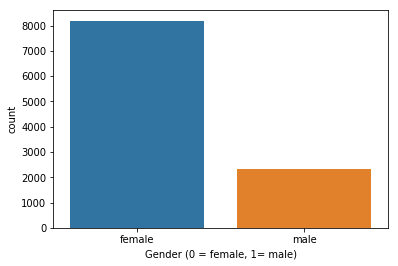

In [15]:
# Countplot to see the distribution of genders in train dataframe
sns.countplot(train_df['gender'])
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

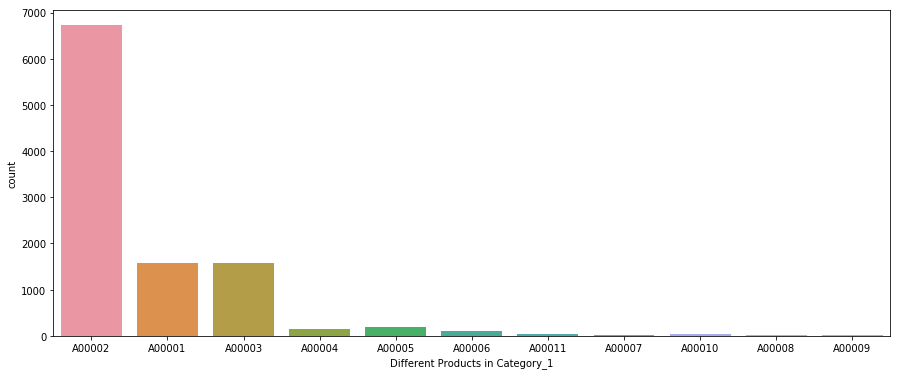

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(train_df['Prod_Category_1'])
plt.xlabel("Different Products in Category_1")
plt.show()

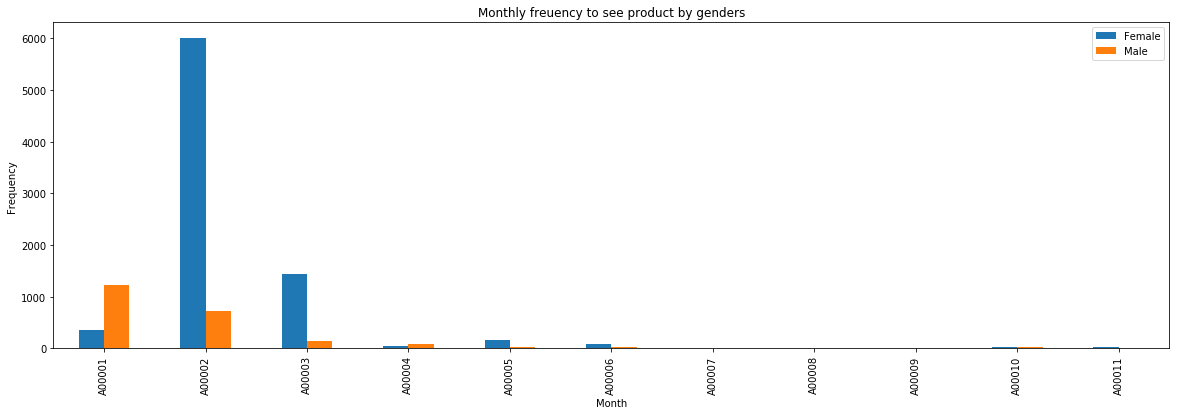

In [17]:
pd.crosstab(train_df.Prod_Category_1,train_df.gender).plot(kind="bar",figsize=(20,6))
plt.title('Monthly freuency to see product by genders')
plt.xlabel('Month')
plt.legend(["Female", "Male"])
plt.ylabel('Frequency')
plt.show()

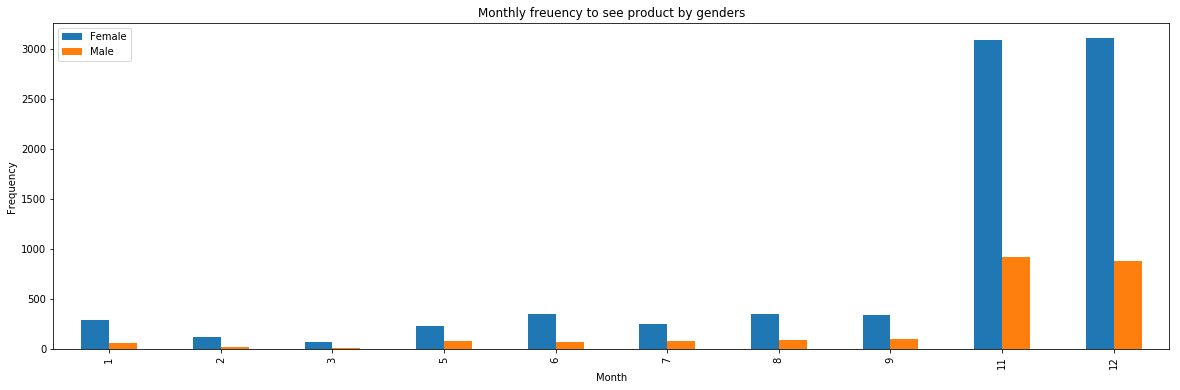

In [18]:
pd.crosstab(train_df.month,train_df.gender).plot(kind="bar",figsize=(20,6))
plt.title('Monthly freuency to see product by genders')
plt.xlabel('Month')
plt.legend(["Female", "Male"])
plt.ylabel('Frequency')
plt.show()

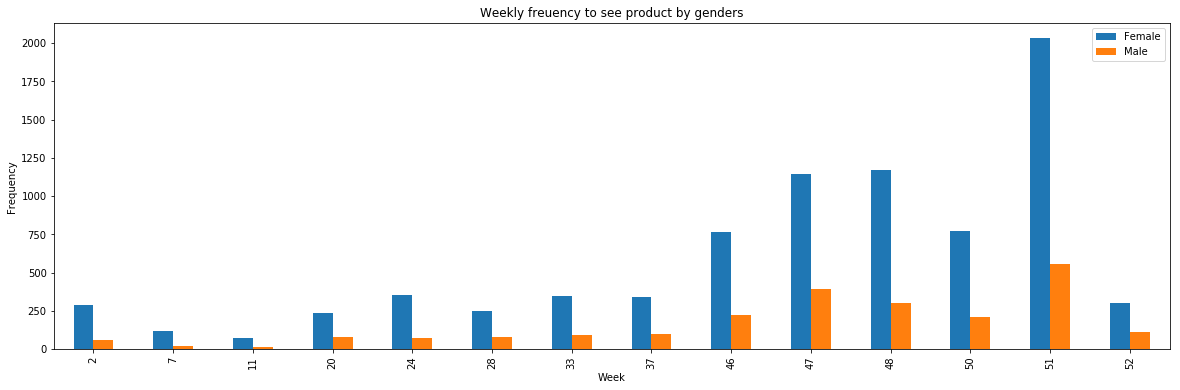

In [19]:
pd.crosstab(train_df.week,train_df.gender).plot(kind="bar",figsize=(20,6))
plt.title('Weekly freuency to see product by genders')
plt.xlabel('Week')
plt.legend(["Female", "Male"])
plt.ylabel('Frequency')
plt.show()

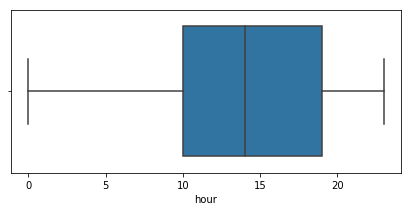

In [20]:
plt.figure(figsize=(7, 3))
sns.boxplot(train_df["hour"])
plt.show()

In [21]:
varlist = ['gender']
def num_map(x):
    return x.map({'female': 0, "male": 1})
train_df[varlist] = train_df[varlist].apply(num_map)

In [22]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for x in train_df.columns:
    if train_df[x].dtype == type(object):
        train_df[x] = train_df[x].fillna('NaN')
        test_df[x] = test_df[x].fillna('NaN')
        encoder = LabelEncoder()
        encoder.fit(list(set(list(train_df[x]) + list(test_df[x]))))
        train_df[x] = encoder.transform(train_df[x])
        test_df[x] = encoder.transform(test_df[x])

In [23]:
# Splitting training dataset into train and test
X = train_df.copy().drop('gender', axis=1).values
y = train_df['gender']

## Model Building

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_v = sc.transform(test_df.copy().values)

C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## XGBoost

In [25]:
# XGB Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier( learning_rate =0.1,
 n_estimators=112,
 max_depth=9,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=13,
 reg_lambda=5,
# max_delta_step=1,
 alpha=0,
 base_score=0.5,
 seed=1029)

xgb.fit(X_train, y_train)

# Predicting the Test set results
Y_predicted = xgb.predict(X_test)  

# Accuracy of XGB model
accuracy_xgb = round(xgb.score(X_train, y_train) * 100, 2)
print("Accuracy score of XGB algorithm is:", accuracy_xgb)

Accuracy score of XGB algorithm is: 81.33


In [27]:
# Predicting the Test set results
test_pred = xgb.predict(test_v)

In [28]:
# load session_id of test dataset
test_session_id = pd.read_csv('test_Yix80N0.csv')['session_id']
print(test_session_id.shape)

(4500,)


In [29]:
# save results to csv
submission_file = pd.DataFrame({'session_id': test_session_id, 'gender': test_pred})
submission_file = submission_file[['session_id','gender']] 
varlist = ['gender']
def num_map(x):
    return x.map({0:'female', 1:'male'})
submission_file[varlist] = submission_file[varlist].apply(num_map)
submission_file.to_csv('Final_Solution.csv', index=False)